# 1. 데이터 로드

### 주요 import 할것들 미리 해두기 (나머지는 그때그때)

In [1]:
import os
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime as dt
from datetime import timedelta as td

In [2]:
import utils

### 경로 등 global config 설정

In [3]:
RAW_ROOT = 'raw'
DATA_ROOT = 'data'

### 원본 데이터 불러오기

In [4]:
%%time
df_user_raw, df_item_raw, df_log_raw, df_sub_raw = utils.load_raw(RAW_ROOT)

CPU times: user 13.7 s, sys: 7.6 s, total: 21.3 s
Wall time: 20 s


---

# 2. 유저 데이터 분석

### 데이터 확인

In [5]:
df_user_raw

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [6]:
list(df_user_raw['FN'].unique())

[nan, 1.0]

In [7]:
list(df_user_raw['Active'].unique())

[nan, 1.0]

In [8]:
list(df_user_raw['club_member_status'].unique())

['ACTIVE', None, 'PRE-CREATE', 'LEFT CLUB']

In [9]:
list(df_user_raw['fashion_news_frequency'].unique())

['NONE', 'Regularly', None, 'Monthly', 'None']

In [10]:
print("age min", df_user_raw['age'].min())
print("age max", df_user_raw['age'].max())

age min 16.0
age max 99.0


In [11]:
df_user_raw['age'].isna().sum()

15861

In [12]:
print("p uniq : ", len(df_user_raw['postal_code'].unique()))
print("total  :", len(df_user_raw))

p uniq :  352899
total  : 1371980


### 기본적인 NaN, None 부터 처리

나이는 나중에 별도로 처리

In [13]:
df_user = df_user_raw.copy()

In [14]:
df_user['FN'].fillna(0, inplace=True)
df_user['Active'].fillna(0, inplace=True)
df_user['club_member_status'].fillna('NONE', inplace=True)
df_user['fashion_news_frequency'].fillna('NONE', inplace=True)
df_user.loc[df_user['fashion_news_frequency'] == 'None', 'fashion_news_frequency'] = 'NONE'

In [15]:
df_user

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


### 나중을 위해서 인덱스 걸기

In [16]:
df_user.set_index('customer_id', inplace=True)

### 소수점 좀 빼자

In [17]:
df_user = df_user.astype({
    'FN': int,
    'Active': int,
})

### 분포 확인

<AxesSubplot:ylabel='FN'>

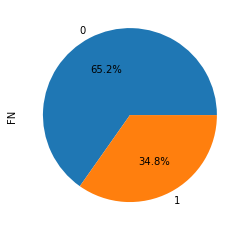

In [18]:
df_user['FN'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<AxesSubplot:ylabel='Active'>

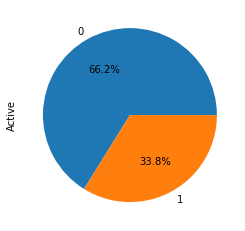

In [19]:
df_user['Active'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<AxesSubplot:>

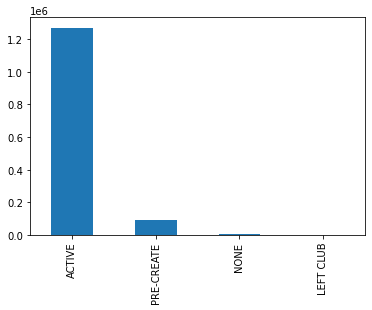

In [20]:
df_user['club_member_status'].value_counts().plot(kind='bar')

<AxesSubplot:>

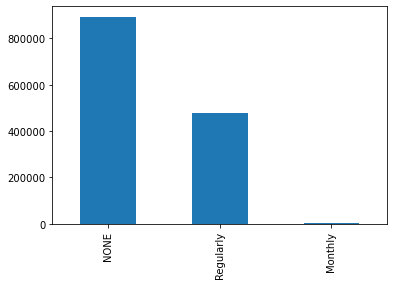

In [21]:
df_user['fashion_news_frequency'].value_counts().plot(kind='bar')

CPU times: user 28.5 s, sys: 2.59 s, total: 31.1 s
Wall time: 26.7 s


<AxesSubplot:ylabel='Density'>

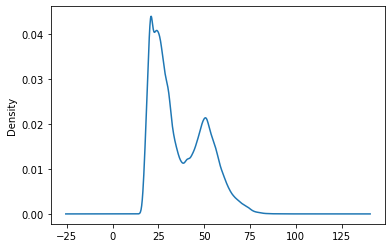

In [22]:
%%time
df_user.loc[df_user['age'].notnull(), 'age'].plot.kde()

In [23]:
df_user['postal_code'].value_counts()[:100]

2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c    120303
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8       261
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1       159
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7       157
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145       156
                                                                     ...  
42f5194adb64a3b3f91eed3eb746c4810a23546a4e8c9f5e4d48bca212add6f4        55
d0d3258e3b7bbf9302e42127a671c037f21546f92e22551ed645fbca9bac8750        55
be7affcdd0a3d1f4abca5c17a0b72b1547ca14e99a1c8bbb59a0ea1dd3679c78        55
dc0df6bc690597a3e07c5ebf17d212573c748d19ba0c6d2bf772a8ba83722963        55
02b46b1c854e574814ceb52a234ebcb0bcedd8c23c3bb0ea91577a24748b42c0        55
Name: postal_code, Length: 100, dtype: int64

### 컬럼간 관계 확인

In [24]:
from itertools import combinations
from IPython.display import display

fields = ['club_member_status', 'fashion_news_frequency', 'FN', 'Active']
for field1, field2 in combinations(fields, 2):
    display(pd.crosstab(df_user[field1], df_user[field2], rownames=[field1], colnames=[field2], margins=True))

fashion_news_frequency,Monthly,NONE,Regularly,All
club_member_status,,,,
ACTIVE,778,800409,471304,1272491
LEFT CLUB,0,459,8,467
NONE,5,5740,317,6062
PRE-CREATE,59,87114,5787,92960
All,842,893722,477416,1371980


FN,0,1,All
club_member_status,,,
ACTIVE,801665,470826,1272491
LEFT CLUB,459,8,467
NONE,5741,321,6062
PRE-CREATE,87185,5775,92960
All,895050,476930,1371980


Active,0,1,All
club_member_status,,,
ACTIVE,814039,458452,1272491
LEFT CLUB,464,3,467
NONE,5744,318,6062
PRE-CREATE,87329,5631,92960
All,907576,464404,1371980


FN,0,1,All
fashion_news_frequency,,,
Monthly,13,829,842
NONE,892931,791,893722
Regularly,2106,475310,477416
All,895050,476930,1371980


Active,0,1,All
fashion_news_frequency,,,
Monthly,44,798,842
NONE,893222,500,893722
Regularly,14310,463106,477416
All,907576,464404,1371980


Active,0,1,All
FN,,,
0,895050,0,895050
1,12526,464404,476930
All,907576,464404,1371980


### 중간 결론

* 애매하긴 하다
* `club_member_status`는 `ACTIVE`랑 `OTHER`로 나누는게 좋을듯
* `fashion_news_frequency`는 `Regularly`와 `Monthly`를 합치자
* 아무리 봐도 `postal_code`는 못쓰겠다

In [25]:
df_user.loc[df_user['club_member_status'] == 'ACTIVE', 'club_member_status'] = 1
df_user.loc[df_user['club_member_status'] == 'NONE', 'club_member_status'] = 0
df_user.loc[df_user['club_member_status'] == 'PRE-CREATE', 'club_member_status'] = 0
df_user.loc[df_user['club_member_status'] == 'LEFT CLUB', 'club_member_status'] = 0
df_user.loc[df_user['fashion_news_frequency'] == 'Regularly', 'fashion_news_frequency'] = 1
df_user.loc[df_user['fashion_news_frequency'] == 'Monthly', 'fashion_news_frequency'] = 1
df_user.loc[df_user['fashion_news_frequency'] == 'NONE', 'fashion_news_frequency'] = 0
if 'postal_code' in df_user.columns:
    df_user = df_user.drop(columns=['postal_code'])

### 이제 나이 NaN 처리

나이 없는 유저

In [26]:
num_user = len(df_user)
num_user_with_no_age = df_user['age'].isna().sum()
print(f"users with no age: {num_user_with_no_age} ({100 * num_user_with_no_age / num_user:.02f}%)")

users with no age: 15861 (1.16%)


고민해봤는데 그냥 호림이처럼 최빈값으로 채우기

In [27]:
global_age_mean = round(df_user.loc[df_user['age'].notnull(), 'age'].mean())
print(f"age mean: {global_age_mean}")

age mean: 36


In [28]:
df_user.loc[df_user['age'].isna(), 'age'] = global_age_mean

In [29]:
df_user.isna().sum()

FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age                       0
dtype: int64

### 나이 추가 처리는 GMM으로

In [30]:
%%time
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2).fit(df_user['age'].values.reshape(-1, 1))

CPU times: user 37.3 s, sys: 30.7 s, total: 1min 8s
Wall time: 4.53 s


In [31]:
mu1, mu2 = gm.means_.flatten()
var1, var2 = gm.covariances_.flatten()
sigma1, sigma2 = np.sqrt(var1), np.sqrt(var2)

In [32]:
del gm

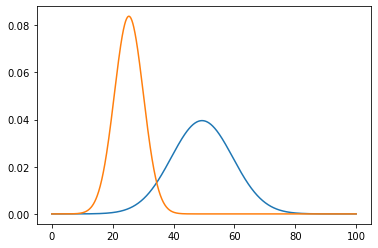

In [33]:
import scipy.stats as stats

x = np.linspace(0, 100, 1000)
plt.plot(x, stats.norm.pdf(x, mu1, sigma1))
plt.plot(x, stats.norm.pdf(x, mu2, sigma2))
plt.show()

In [34]:
df_user['age_gmm_1'] = (df_user['age'] - mu1) / sigma1
df_user['age_gmm_2'] = (df_user['age'] - mu2) / sigma2

# 3 . 유저 자체 전처리 완료

일단 여기까지 저장. 로그 쓰는 추가 필드는 별도로 진행 (CV, LB에 따라 다르니)

In [35]:
df_user

,FN,Active,club_member_status,fashion_news_frequency,age,age_gmm_1,age_gmm_2
customer_id,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,0,0,1,0,49.0,-0.035845,4.973913
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,0,0,1,0,25.0,-2.415854,-0.068474
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0,0,1,0,24.0,-2.515021,-0.278574
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,0,0,1,0,54.0,0.459991,6.024411
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,1,1,1,1,52.0,0.261657,5.604212
...,...,...,...,...,...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,0,0,1,0,24.0,-2.515021,-0.278574
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,0,0,1,0,21.0,-2.812523,-0.908872
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,1,1,1,1,21.0,-2.812523,-0.908872


In [36]:
%%time
df_user.to_parquet(f'{DATA_ROOT}/df_user_preprocessed.pq')

CPU times: user 1.11 s, sys: 223 ms, total: 1.33 s
Wall time: 1.31 s


In [37]:
del df_user

In [38]:
del df_user_raw
del df_item_raw
del df_log_raw
del df_sub_raw